# ECG classification

Laurent Cetinsoy - Datadidacte


In [19]:
from IPython.display import HTML

In [20]:
!pip install matplotlib

## A first naive model by extracting simple features


Your environment contains variables arr, nsr, and chf which respectively contain 10-second recordings of ECG signals extracted from three datasets on PhysioNet: one from a person suffering from arrhythmia, one from a person with a normal heart rhythm, and another from a person with heart failure.


Matplotlib  subplots (or any other library), display these signals on three subfigures (the subplots should be called with the parameter nrows = 3).
Can you find any differences between them?

In [21]:
import numpy as np

dataset_path = '/kaggle/input/ecg-ml/datasets'

arr = np.loadtxt(dataset_path+'/arr.txt')
nsr = np.loadtxt(dataset_path+'/nsr.txt')
chf = np.loadtxt(dataset_path+'/chf.txt')

In [22]:
arr

array([-0.345, -0.345, -0.345, ..., -0.34 , -0.33 , -0.34 ])

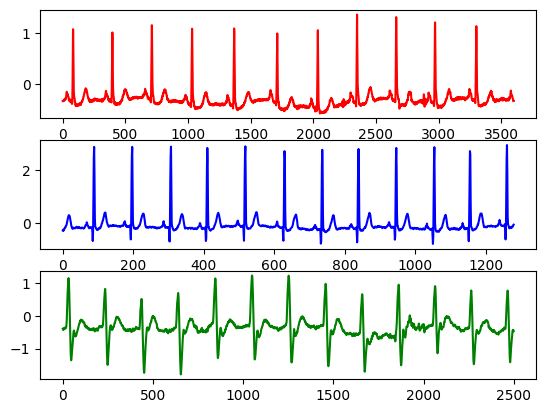

In [23]:
import matplotlib.pyplot as plt

x = np.arange(0, len(arr), 1)
x2 = np.arange(0, len(nsr), 1)
x3 = np.arange(0, len(chf), 1)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1)

ax1.plot(x, arr, c='r', label='the data')
ax2.plot(x2, nsr, c='b', label='nsr')
ax3.plot(x3, chf, c='g', label='chf')

plt.show()

Differences :  
In blue, we can observe the signal of a healthy heart. It shows a regular signal, with pics that are very clear and well defined.
Then, if we focus on the green signal, the one with heart failure, we can see without a doubt that the signal is weaker, with a smaller amplitude. Despite this, the frequence of the pics stay regular.
Finally, the red signal looks similar to the blue one, so similar to a healthy heart, in terms of amplitude. But there is a noticebal difference in terms of frequence, which is a sign of arrythmia.

We want to extract features from the time series. For that we will use simple statistics.


Create a function named calculate_stats_features(x) that calculates some statistical features of a signal x using standard numpy functions: nanpercentile, nanmean, etc.
calculate_stats_features will return a list of features in this order:

0. Max
1. Min
2. Mean
3. Median
4. Variance

In [24]:
def calculate_stats_features(x):
    max = np.nanmax(x)
    min = np.nanmin(x)
    mean = np.nanmean(x)
    median = np.nanmedian(x)
    variance = np.nanvar(x)
    return [max, min, mean, median, variance]

In [25]:
print(calculate_stats_features(arr), '\n', calculate_stats_features(chf), '\n', calculate_stats_features(nsr))

[1.375, -0.59, -0.3120111111111112, -0.335, 0.039663552654320984] 
 [1.235, -1.79, -0.363622, -0.375, 0.15541165111599997] 
 [2.965, -0.785, -0.035453124999999995, -0.145, 0.21755463842773434]




Create a function named `calculate_zero_crossing(x)` that calculates the Zero
Crossing of a signal x.

The zero crossing is defined as the number of times the signal changes sign.
For this, you can use the signbit, diff, and nonzero functions from numpy.


In [26]:
def calculate_zero_crossing(x):
    return np.count_nonzero(np.diff(np.signbit(x)))

In [27]:
print(calculate_zero_crossing(arr), calculate_zero_crossing(chf), calculate_zero_crossing(nsr))

22 28 66


Create a function named **calculate_rms(x)** that returns the Root Mean Square (RMS) of a signal x. We will use the nanmean function instead of the mean function from numpy.

In [28]:
def calculate_rms(x):
    return np.sqrt(np.nanmean(x**2))

In [29]:
print(calculate_rms(arr), calculate_rms(chf), calculate_rms(nsr))

0.37015467862923346 0.5363139099445399 0.46777298179779475


Create a function named calculate_entropy(x) that calculates the Shannon entropy of a signal x using the entropy function from scipy.stats.

In [30]:
import scipy

def calculate_entropy(x):
    _, counts = np.unique(x, return_counts=True)
    probabilities = counts / counts.sum()
    shannon_entropy = scipy.stats.entropy(probabilities)
    
    return shannon_entropy

In [31]:
print(calculate_entropy(arr), calculate_entropy(chf), calculate_entropy(nsr))

4.444550643807692 5.298054917262371 3.9597588364931857


Create a function get_features(x) that combines the features calculated by all previous functions including caculate_stats_features.

In [32]:
def get_features(x):
    zero_crossings = calculate_zero_crossing(x)
    shannon_entropy = calculate_entropy(x)
    stats_features = calculate_stats_features(x)
    features = {
        "zero_crossings": zero_crossings,
        "entropy": shannon_entropy
    }
    stats = ["max", "min", "mean", "median", "variance"]
    features.update({
        stats[i]: stats_features[i] for i in range(len(stats_features))
    })
    return features

In [33]:
get_features(arr)

{'zero_crossings': 22,
 'entropy': 4.444550643807692,
 'max': 1.375,
 'min': -0.59,
 'mean': -0.3120111111111112,
 'median': -0.335,
 'variance': 0.039663552654320984}

Load the small ecg dataset
Use your fonction get_features create a new dataframe where you have all the feature as X and y as the label.
Train a random forest on it after doing a train test split if the dataset is not too small

In [34]:
!pip install pandas

In [35]:
import pandas as pd

df = pd.read_csv(dataset_path+'/ecg_small_dataset.csv')
df.drop(df.columns[0], axis=1, inplace=True)
df

,1,2,3,4,5,6,7,8,9,10,...,15352,15353,15354,15355,15356,15357,15358,15359,15360,15361
0,1,-0.429539,-0.431368,-0.427633,-0.453029,-0.460659,-0.448497,-0.469340,-0.475054,-0.473138,...,-0.299412,-0.341126,-0.364847,-0.360565,-0.358913,-0.406275,-0.452011,-0.440424,-0.417412,-0.419938
1,1,-0.527040,-0.542357,-0.539678,-0.541406,-0.518841,-0.505650,-0.523337,-0.532713,-0.520244,...,-0.523533,-0.542245,-0.544550,-0.523466,-0.510608,-0.497607,-0.508469,-0.495939,-0.479749,-0.484566
2,2,-0.410425,-0.416644,-0.424048,-0.398195,-0.393680,-0.386315,-0.371686,-0.377065,-0.368017,...,-0.288222,-0.742357,-1.088831,-1.347331,-1.349561,-1.165759,-1.004126,-0.829844,-0.671777,-0.536377
3,2,-0.007009,-0.069041,-0.063572,-0.080944,-0.070556,-0.098701,-0.090165,-0.108852,-0.074475,...,-1.906522,-1.694052,-1.534222,-1.338660,-1.167661,-0.989236,-0.777201,-0.544748,-0.313120,-0.032588
4,0,-0.325000,-0.395000,-0.255000,-0.335000,-0.375000,-0.335000,-0.285000,-0.275000,-0.245000,...,-0.085000,-0.105000,-0.135000,-0.135000,-0.155000,-0.155000,-0.135000,-0.145000,-0.125000,-0.115000
5,0,-0.185000,-0.155000,-0.125000,-0.115000,-0.105000,-0.095000,-0.085000,-0.065000,-0.025000,...,-0.105000,-0.135000,-0.145000,-0.145000,-0.155000,-0.165000,-0.165000,-0.145000,-0.155000,-0.135000


Separation of the label and the content

In [36]:
y = df.iloc[:, 0] # Label
X_raw = df.iloc[:, 1:] # Content

Create a new dataframe with the features

In [37]:
feature_list = []
for x in X_raw.to_numpy():
    feature_list.append(get_features(x))
X = pd.DataFrame(feature_list)

In [38]:
X

,zero_crossings,entropy,max,min,mean,median,variance
0,358,9.639522,1.002118,-0.592731,-0.340759,-0.376057,0.032634
1,0,9.639522,-0.281521,-0.923734,-0.510468,-0.505293,0.003658
2,418,9.639522,1.235749,-2.492697,-0.344063,-0.354895,0.146738
3,384,9.639522,1.295494,-3.105455,-0.195126,-0.133382,0.721041
4,1150,6.237319,2.445000,-1.005000,-0.046349,-0.105000,0.133627
5,812,5.676426,1.645000,-1.265000,-0.077669,-0.115000,0.064813


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

# Train Random Forest Classifier
clf = RandomForestClassifier(random_state=43)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

Test Accuracy: 0.50


The dataset is extremely small, (only 6 entries), so the accuracy will solely depend on wheter the train_test_split manages to take at least one of each categories. That is why the accuracy can be 0 (random_state = 42), or 1 (random_state = 41), or even 0.50 (random_state = 43) depending on the split.

Now you have a first pipeline, do the same on the full dataset
Report the train and test loss

In [40]:
df = pd.read_csv(dataset_path+'/ECG_classification_full_dataset/ECG-laurent.csv')
df.drop(df.columns[0], axis=1, inplace=True)
df

/tmp/ipykernel_30/660009191.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dataset_path+'/ECG_classification_full_dataset/ECG-laurent.csv')


,1,2,3,4,5,6,7,8,9,10,...,65528,65529,65530,65531,65532,65533,65534,65535,65536,65537
0,1,-0.060085,0.001638,-0.014941,-0.018776,-0.110048,-0.160348,-0.196445,-0.287140,-0.383509,...,-0.145316,-0.088612,0.001568,0.066026,0.154291,0.214976,0.227396,0.172451,0.011588,-0.154281
1,1,-0.467585,-0.650931,-0.595663,-0.627657,-0.552164,-0.532318,-0.500500,-0.486974,-0.480109,...,0.273010,0.279927,0.213876,0.137012,0.019218,-0.031818,-0.068809,-0.068333,-0.178109,-0.136239
2,1,-0.155555,-0.229827,-0.207653,-0.210114,-0.191253,-0.184057,-0.152477,-0.171106,-0.159727,...,-1.238173,-1.112138,-0.812259,-0.595419,-0.444057,-0.326833,-0.117486,-0.038309,-0.015658,0.004507
3,1,0.099644,0.098019,0.089555,0.108130,0.070369,0.083866,0.073525,0.061310,0.081658,...,-0.291689,-0.111845,0.180895,0.373213,0.486517,0.394578,0.283331,0.169355,0.166666,0.146715
4,1,-0.368856,-0.530640,-0.487672,-0.447722,-0.276366,-0.292531,-0.236326,-0.209993,-0.174277,...,-0.546984,-0.427314,-0.527221,-0.588838,-0.624649,-0.577075,-0.652600,-0.500391,-0.386848,-0.161838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,2,0.074907,0.105856,-0.000567,-0.439990,-0.876207,-1.187291,-1.334461,-1.255440,-1.070235,...,-0.027454,0.002023,0.025988,0.018896,0.033075,0.050003,0.059558,0.056467,0.098536,0.089279
158,2,-0.320028,-0.404340,-0.396922,-0.409747,-0.408599,-0.397462,-0.391675,-0.345731,-0.350851,...,-0.235219,-0.209356,-0.203681,-0.195236,-0.203310,-0.192466,-0.200470,-0.177530,-0.195617,-0.168229
159,2,-0.117367,-0.069165,-0.072747,-0.090340,-0.095915,-0.094605,-0.138618,-0.139901,-0.146395,...,-0.194281,-0.188166,-0.179020,-0.201753,-0.184603,-0.185422,-0.180237,-0.187840,-0.172069,-0.171569
160,2,0.191584,0.405085,0.315481,0.218790,-0.024663,-0.169857,-0.366068,-0.493332,-0.618309,...,-0.203226,-0.223304,-0.226758,-0.238972,-0.218572,-0.261438,-0.243642,-0.320345,-0.296373,-0.381885


In [41]:
from sklearn.metrics import log_loss

y = df.iloc[:, 0] # Label
X_raw = df.iloc[:, 1:] # Content

feature_list = []
for x in X_raw.to_numpy():
    feature_list.append(get_features(x))
X = pd.DataFrame(feature_list)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

# Train Random Forest Classifier
clf = RandomForestClassifier(random_state=43)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)
y_pred_proba_test = clf.predict_proba(X_test) # Predict probabilities for the log loss

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

# Compute log loss on the test set
test_log_loss = log_loss(y_test, y_pred_proba_test)
print(f"Test Log Loss: {test_log_loss:.4f}")

# Make predictions on the train set for calculating training loss
y_pred_train = clf.predict_proba(X_train)

# Compute log loss on the train set
train_log_loss = log_loss(y_train, y_pred_train)
print(f"Train Log Loss: {train_log_loss:.4f}")

Test Accuracy: 0.91
Test Log Loss: 0.2159
Train Log Loss: 0.0839


try to tweak the model hyperparameter to see if it works

Hyperparameter grid for RandomizedSearchCV :

In [42]:
param_dist = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

In [43]:
from sklearn.model_selection import RandomizedSearchCV

clf = RandomForestClassifier(random_state=43)

random_search = RandomizedSearchCV(
    estimator=clf, param_distributions=param_dist,
    n_iter=10, cv=10, verbose=2, random_state=43, n_jobs=-1
)

random_search.fit(X_train, y_train)

print(f"Best parameters found: {random_search.best_params_}")

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best parameters found: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 10}


Now let's use the best model :

In [44]:
# Use the best model
best_clf = random_search.best_estimator_

# Make predictions on the test set
y_pred = best_clf.predict(X_test)
y_pred_proba_test = best_clf.predict_proba(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy after tuning: {accuracy:.2f}")

# Compute log loss on the test set
test_log_loss = log_loss(y_test, y_pred_proba_test)
print(f"Test Log Loss after tuning: {test_log_loss:.4f}")

# Make predictions on the train set for calculating training loss
y_pred_train = best_clf.predict_proba(X_train)

# Compute log loss on the train set
train_log_loss = log_loss(y_train, y_pred_train)
print(f"Train Log Loss after tuning: {train_log_loss:.4f}")

Test Accuracy after tuning: 0.91
Test Log Loss after tuning: 0.1728
Train Log Loss after tuning: 0.1231


The hyperparameter search indeed improve the test loss.

## Fourier transform features

We want now to see if a model using only fourier transform could work.

create a function get_fourier_coefficients(ecg)

In [45]:
def get_fourier_coefficients(ecg):
    # Apply Fast Fourier Transform (FFT)
    fft_coeffs = np.fft.fft(ecg)
    
    # Take the absolute value (magnitude) of the coefficients
    fft_magnitude = np.abs(fft_coeffs)
    
    return fft_magnitude

In [46]:
X

,zero_crossings,entropy,max,min,mean,median,variance
0,4154,11.090355,3.006143,-2.460911,-0.268554,-0.346791,0.420271
1,3768,11.090355,2.527708,-3.550697,-0.221014,-0.106818,0.536639
2,2253,11.090355,2.264555,-3.929179,-0.163022,-0.153941,0.182135
3,3102,11.090355,3.055421,-1.906982,0.053962,0.051409,0.158568
4,4748,11.090355,2.035001,-1.575197,-0.148872,-0.174830,0.111417
...,...,...,...,...,...,...,...
157,2068,11.090355,0.635837,-2.036593,-0.217742,-0.113975,0.165278
158,692,11.090355,2.777683,-1.408466,-0.270539,-0.258593,0.023627
159,1762,11.090355,0.919894,-1.070185,-0.172078,-0.164195,0.018569
160,3645,11.090355,7.078177,-5.961910,-0.343730,-0.390100,0.545255


Using this function create a dataframe df_fourrier containing the fourrier transform coefficients and the label

In [47]:
# Apply Fourier transformation to each row
fourier_coefficients = X.apply(lambda row: get_fourier_coefficients(row.values), axis=1)

# Convert the list of Fourier coefficients into a DataFrame
df_fourier = pd.DataFrame(fourier_coefficients.tolist())

# Add the label column back to the DataFrame
df_fourier['label'] = y.values

print(df_fourier.head(10))

             0            1            2            3            4  \
0  4165.440512  4163.057808  4147.354562  4145.894728  4145.894728   
1  3778.276172  3778.120440  3760.898333  3759.873196  3759.873196   
2  2262.290903  2263.264484  2246.073541  2245.070538  2245.070538   
3  3114.502733  3110.009916  3095.561530  3094.214520  3094.214520   
4  4759.337874  4756.134362  4742.768909  4739.451277  4739.451277   
5  4628.512417  4623.547108  4610.535947  4607.684824  4607.684824   
6  2466.695321  2464.241659  2451.338936  2447.116708  2447.116708   
7  3863.611183  3860.074454  3846.311502  3843.838202  3843.838202   
8  1589.576511  1588.834227  1575.537770  1570.909895  1570.909895   
9    39.129756    39.469600    29.056689    20.464649    20.464649   

             5            6  label  
0  4147.354562  4163.057808      1  
1  3760.898333  3778.120440      1  
2  2246.073541  2263.264484      1  
3  3095.561530  3110.009916      1  
4  4742.768909  4756.134362      1  
5  4610

Try to train a model using the Fourrier coefficient

Getting the new X and y based on the Fourrier coefficient

In [48]:
X = df_fourier.drop(columns=['label'])
y = df_fourier['label']

The rest is the same as before :

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

# Initialize the Random Forest Classifier
clf = RandomForestClassifier(random_state=43)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
test_log_loss = log_loss(y_test, y_pred_proba)

# Output the results
print(f"Test Accuracy: {accuracy:.2f}")
print(f"Test Log Loss: {test_log_loss:.4f}")


Test Accuracy: 0.48
Test Log Loss: 2.0601


Try to learn a model using both fourrier coefficient and the features from the previous sections. Does it work ?

Function to get both the fourrier coefficient and the features :

In [50]:
def get_combined_features(ecg):
    # Get Fourier coefficients
    fourier_features = get_fourier_coefficients(ecg)
    fourier_dict = {f"coeff_fourrier_{i}": fourier_features[i] for i in range(len(fourier_features))}
    
    # Get statistical features
    statistical_features = get_features(ecg)
    
    # Combine both feature sets into one dictionary
    combined_features = {**fourier_dict, **statistical_features}
    
    return combined_features


Getting all the combined features

In [51]:
combined_features_list = []

# Iterate over each row in the dataset (each ECG signal)
for i, row in X.iterrows():
    # Extract ECG signal as a NumPy array
    ecg_signal = row.values
    
    # Extract combined features (Fourier + previous) for the current row
    features = get_combined_features(ecg_signal)
    
    combined_features_list.append(features)

Creating a Dataframe from it

In [52]:
df_combined = pd.DataFrame(combined_features_list)

# Add the label column back to the DataFrame
df_combined['label'] = y.values

print(df_combined.head())

   coeff_fourrier_0  coeff_fourrier_1  coeff_fourrier_2  coeff_fourrier_3  \
0      29078.054708         40.298107          9.276965          9.560633   
1      26376.060109         40.700689          8.434956         13.199096   
2      15771.108029         39.461466          7.315947         14.313268   
3      21714.074665         39.385273         10.831374          6.494413   
4      33236.046968         39.213579          6.483759          6.038265   

   coeff_fourrier_4  coeff_fourrier_5  coeff_fourrier_6  zero_crossings  \
0          9.560633          9.276965         40.298107               0   
1         13.199096          8.434956         40.700689               0   
2         14.313268          7.315947         39.461466               0   
3          6.494413         10.831374         39.385273               0   
4          6.038265          6.483759         39.213579               0   

    entropy          max          min         mean       median   variance  \
0  1.351

The rest is the same as usual

In [53]:
# Split the features and labels
X_combined = df_combined.drop(columns=['label'])
y_combined = df_combined['label']

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_combined, test_size=0.2, random_state=43)

# Initialize and train the Random Forest Classifier
clf = RandomForestClassifier(random_state=43)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
test_log_loss = log_loss(y_test, y_pred_proba)

# Output the results
print(f"Test Accuracy with combined features: {accuracy:.2f}")
print(f"Test Log Loss with combined features: {test_log_loss:.4f}")


Test Accuracy with combined features: 0.88
Test Log Loss with combined features: 0.3364


It seems to work a lot better than Fourrier alone.

## Wavelets

We now wants to use another signal decomposition which are called wavelet. Wavelet are a multi-scale function decomposition on a familly of functions generated from what is called a mother wavelet.

Using PyWavelet make a function get_wavelet_coefficients(ecg) that returns the wavelet coefficient of a given ECG


In [54]:
!pip install pywavelets

In [55]:
import pywt

def get_wavelet_coefficients(ecg):
    # Perform wavelet decomposition
    coeffs = pywt.wavedec(ecg, wavelet='db1', level=4)
    
    # Flatten the list of coefficients and convert to a NumPy array
    return np.concatenate([np.ravel(c) for c in coeffs])

Using the get_wavelet_coefficients, create a dataframe when the features are the coefficients and include the label

creating our wavelet coefficient list from raw_X, the signal before extraction of any feature.

In [56]:
wavelet_coef_list = []

# Iterate over each row in the dataset (each ECG signal)
for i, row in X_raw.iterrows():
    # Extract ECG signal as a NumPy array
    ecg_signal = row.values
    
    # Extract wavelet coefficients
    wavelet_coef = get_wavelet_coefficients(ecg_signal)
    
    # Append the wavelet features to the list
    wavelet_coef_list.append(wavelet_coef)

Creation of the dataframe

In [57]:
df_wavelet = pd.DataFrame(wavelet_coef_list)

print(df_wavelet.head())

      0         1         2         3         4         5         6      \
0 -0.893734 -1.545451 -1.384842 -1.988961 -0.214607 -0.065845 -3.894742   
1 -1.828922 -2.785957 -5.186017 -1.394559 -1.413645 -5.095248 -2.167857   
2 -0.598158 -0.105971 -1.041226 -0.248281  0.467722  0.437163  0.212743   
3  0.028110  3.090564  0.110616  0.717653  1.653933  2.469744  2.073614   
4 -0.909145  0.237921 -1.063548 -0.535315 -0.111760 -1.416639  0.825790   

      7         8         9      ...     65526     65527     65528     65529  \
0 -0.928715 -2.256714 -1.986642  ...  0.065699  0.016719  0.053518  0.021233   
1 -1.994801 -1.945457 -1.966718  ... -0.010720 -0.015836 -0.018014 -0.048044   
2 -3.539629 -3.684178 -2.353014  ... -0.023410  0.025392  0.068484  0.084473   
3 -1.826662 -3.483767 -1.702828  ... -0.017118  0.011268  0.044394  0.175267   
4 -0.544361 -0.389545 -0.114162  ...  0.013890  0.004778 -0.050799 -0.437964   

      65530     65531     65532     65533     65534     65535  
0  0

Train a random forest classifier with such features. DOes the model work

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss

# Split the features and labels
X_wavelet = df_wavelet
y_wavelet = y.values

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_wavelet, y_wavelet, test_size=0.2, random_state=43)

# Initialize and train the Random Forest Classifier
clf = RandomForestClassifier(random_state=43)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
test_log_loss = log_loss(y_test, y_pred_proba)

# Output the results
print(f"Test Accuracy with wavelet features: {accuracy:.2f}")
print(f"Test Log Loss with wavelet features: {test_log_loss:.4f}")

Test Accuracy with wavelet features: 0.70
Test Log Loss with wavelet features: 0.7780


The model seems to work pretty well, even though it could still be improved.

Add one or several of the previous feature functions and try to train another model

Only statistical features with wavelet

In [69]:
def get_combined_features_with_wavelet(ecg):
    # Get wavelet coefficients
    wavelet_features = get_wavelet_coefficients(ecg)
    wavelet_dict = {f"wavelet_{i}": wavelet_features[i] for i in range(len(wavelet_features))}
    
    # Get statistical features
    statistical_features = get_features(ecg)
    
    # Combine all feature sets into one dictionary
    combined_features = {**wavelet_dict, **statistical_features}
    
    return combined_features

Only Fourrier with wavelet

In [70]:
def get_fourrier_with_wavelet(ecg):
    # Get Fourier coefficients
    fourier_features = get_fourier_coefficients(ecg)
    fourier_dict = {f"fourier_{i}": fourier_features[i] for i in range(len(fourier_features))}
    
    # Get wavelet coefficients
    wavelet_features = get_wavelet_coefficients(ecg)
    wavelet_dict = {f"wavelet_{i}": wavelet_features[i] for i in range(len(wavelet_features))}
    
    # Combine all feature sets into one dictionary
    combined_features = {**fourier_dict, **wavelet_dict}
    
    return combined_features

Trying to use all the features at our disposal :

In [71]:
def get_combined_features_and_fourrier_with_wavelet(ecg):
    # Get Fourier coefficients
    fourier_features = get_fourier_coefficients(ecg)
    fourier_dict = {f"fourier_{i}": fourier_features[i] for i in range(len(fourier_features))}
    
    # Get wavelet coefficients
    wavelet_features = get_wavelet_coefficients(ecg)
    wavelet_dict = {f"wavelet_{i}": wavelet_features[i] for i in range(len(wavelet_features))}
    
    # Get statistical features
    statistical_features = get_features(ecg)
    
    # Combine all feature sets into one dictionary
    combined_features = {**fourier_dict, **wavelet_dict, **statistical_features}
    
    return combined_features

Training the corresponding models using this :

In [72]:
combined_features_list = []

for i, row in X_raw.iterrows():
    ecg_signal = row.values
    features = get_combined_features_with_wavelet(ecg_signal)
    combined_features_list.append(features)

# Convert the list of combined features into a DataFrame
df_combined = pd.DataFrame(combined_features_list)

# Add the label column back to the DataFrame
X_combined = df_combined
y_combined = y.values

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_combined, test_size=0.2, random_state=43)

# Initialize and train the Random Forest Classifier
clf = RandomForestClassifier(random_state=43)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
test_log_loss = log_loss(y_test, y_pred_proba)

# Output the results
print(f"Test Accuracy with combined features: {accuracy:.2f}")
print(f"Test Log Loss with combined features: {test_log_loss:.4f}")

Test Accuracy with combined features: 0.73
Test Log Loss with combined features: 0.7874


In [73]:
combined_features_list = []

for i, row in X_raw.iterrows():
    ecg_signal = row.values
    features = get_fourrier_with_wavelet(ecg_signal)
    combined_features_list.append(features)

# Convert the list of combined features into a DataFrame
df_combined = pd.DataFrame(combined_features_list)

# Add the label column back to the DataFrame
X_combined = df_combined
y_combined = y.values

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_combined, test_size=0.2, random_state=43)

# Initialize and train the Random Forest Classifier
clf = RandomForestClassifier(random_state=43)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
test_log_loss = log_loss(y_test, y_pred_proba)

# Output the results
print(f"Test Accuracy with fourrier: {accuracy:.2f}")
print(f"Test Log Loss with fourrier: {test_log_loss:.4f}")

Test Accuracy with fourrier: 0.82
Test Log Loss with fourrier: 0.5597


In [74]:
combined_features_list = []

for i, row in X_raw.iterrows():
    ecg_signal = row.values
    features = get_combined_features_and_fourrier_with_wavelet(ecg_signal)
    combined_features_list.append(features)

# Convert the list of combined features into a DataFrame
df_combined = pd.DataFrame(combined_features_list)

# Add the label column back to the DataFrame
X_combined = df_combined
y_combined = y.values

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_combined, test_size=0.2, random_state=43)

# Initialize and train the Random Forest Classifier
clf = RandomForestClassifier(random_state=43)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
test_log_loss = log_loss(y_test, y_pred_proba)

# Output the results
print(f"Test Accuracy with combined features and fourrier: {accuracy:.2f}")
print(f"Test Log Loss with combined features and fourrier: {test_log_loss:.4f}")

Test Accuracy with combined features and fourrier: 0.91
Test Log Loss with combined features and fourrier: 0.5407


Specify the methodology you used to train the model and report the various attempts results into a table

I made a test which each of the features we used previously, paired with wavelets. The results are as follows :

|          | wavelet_features_alone | wavelet_and_features | wavelet_and_fourrier | every_features_and_fourrier |
|----------|------------------------|----------------------|----------------------|-----------------------------|
| Accuracy | 0.70                   | 0.73                 | 0.82                 | 0.91                        |
| Loss     | 0.7780                 | 0.7874               | 0.5597               | 0.5407                      |

## Deep learning (1D CNN)

Now we want to see if we can skip all theses feature engineering techniques !
Design and train a multi-layer one dimensional CNN using the raw ECG signal as features.


Could you reach or surpass the feature based models ?

In [75]:
from sklearn.model_selection import train_test_split

# Assuming X contains raw ECG signals and y contains the labels
X = X_raw.values  # Convert to numpy array if not already
y = y.values

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [76]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot encoding if needed
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Define the model
model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(y_train_cat.shape[1], activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [77]:
# Reshape data to fit the CNN input
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Train the model
history = model.fit(X_train_reshaped, y_train_cat, epochs=20, batch_size=64, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_reshaped, y_test_cat)
print(f"Test Accuracy with 1D CNN: {test_accuracy:.2f}")
print(f"Test Loss with 1D CNN: {test_loss:.2f}")


Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 18s 7s/step - accuracy: 0.2501 - loss: 7.0626 - val_accuracy: 0.5769 - val_loss: 7.5840
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 15s 7s/step - accuracy: 0.4644 - loss: 6.1893 - val_accuracy: 0.5385 - val_loss: 1.1688
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 20s 6s/step - accuracy: 0.4876 - loss: 3.8874 - val_accuracy: 0.6538 - val_loss: 1.7436
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 15s 7s/step - accuracy: 0.7795 - loss: 1.6022 - val_accuracy: 0.6154 - val_loss: 1.4669
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 20s 6s/step - accuracy: 0.8690 - loss: 0.4675 - val_accuracy: 0.6923 - val_loss: 1.0086
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 15s 7s/step - accuracy: 0.9339 - loss: 0.2526 - val_accuracy: 0.7692 - val_loss: 0.7424
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 14s 6s/step - accuracy: 0.9520 - loss: 0.2418 - val_accuracy: 0.6923 - val_loss: 0.7446
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 15s 7s/step - accuracy: 0.9455 - loss: 0.2467 - val_accuracy: 0.6923 - val_loss: 0.9913
Epoch 9/

Yes, it could reach or even surpass the previous results, if we improved this model.